In [1]:
import numpy as np
import os
import pandas as pd
import random
import sys
import cv2
import time
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import gym
from tqdm import tqdm_notebook as tqdm
from DQN_N import DeepQNetwork

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with open('./saved_networks/train_history.pickle', 'rb') as file:
    train_history =pickle.load(file)

In [3]:
np.asarray(train_history).T

array([[8.06200000e-01, 4.54800000e+02, 8.43259000e-01, 1.89017274e-02],
       [1.23850000e+00, 4.43600000e+02, 7.91386000e-01, 1.55268704e-02],
       [1.67440000e+00, 4.73300000e+02, 7.39075000e-01, 1.40385994e-02],
       [2.11290000e+00, 4.99400000e+02, 6.86461000e-01, 1.25327538e-02],
       [2.57020000e+00, 5.60600000e+02, 6.31585000e-01, 1.11244779e-02],
       [3.04690000e+00, 5.75900000e+02, 5.74378000e-01, 9.83955837e-03],
       [3.54270000e+00, 6.67300000e+02, 5.14879000e-01, 9.00171042e-03],
       [4.04650000e+00, 6.92800000e+02, 4.54423000e-01, 8.25958073e-03],
       [4.56780000e+00, 7.39700000e+02, 3.91870000e-01, 7.75606008e-03],
       [5.10830000e+00, 8.37100000e+02, 3.27007000e-01, 7.31281870e-03],
       [5.64390000e+00, 8.28500000e+02, 2.62741000e-01, 6.99479870e-03],
       [6.22460000e+00, 1.00930000e+03, 1.93057000e-01, 6.89218516e-03],
       [6.80370000e+00, 1.04290000e+03, 1.23565000e-01, 6.65112936e-03],
       [7.39070000e+00, 1.01230000e+03, 1.00000000e

In [4]:
df = pd.DataFrame(np.asarray(train_history).T, columns=['step(w)', 'mean_score', 'epsilon', 'loss'])

In [5]:
df = df.set_index('step(w)')

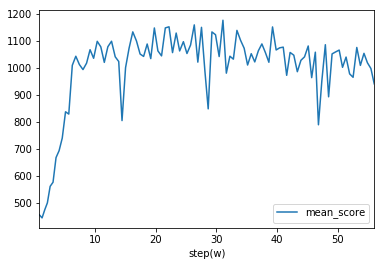

In [6]:
df.plot(y='mean_score')

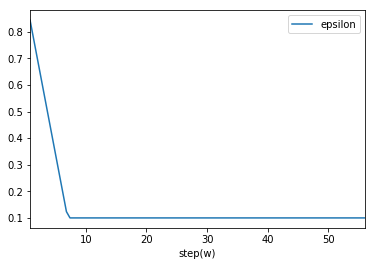

In [7]:
df.plot(y='epsilon')

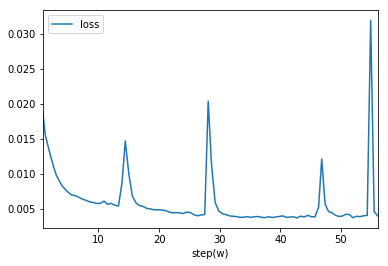

In [8]:
df.plot(y='loss')

In [9]:
env = gym.make('MsPacman-v0')# Breakout-ram-v0

width = 84
height = 84
batch_size = 32
memory_size = 80000
replace_iter = 4000
frame_repeat = 4
n_a = env.action_space.n
push = False

RL = DeepQNetwork(n_a,
                  st_shape = [width, height],
                  learning_rate= 0.0001,
                  reward_decay =0.99,
                  memory_size= memory_size,
                  batch_size = batch_size,
                  training = False,
                  output_graph = False,)

INFO:tensorflow:Restoring parameters from saved_networks/saved_dqn-559999
Successfully loaded: saved_networks/saved_dqn-559999


In [10]:
def preprocess(img, width, height):
    img = np.array(img, dtype = np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (width, height))
    img = img.astype(np.float)
    img /= 255
    
    return img

In [11]:
def skip_step(frames_to_skip, env, step, action):
    reward = 0
    for i in range(frames_to_skip):
        state, r, done, info = step(action)
        reward += r 
        if done:
            break
    return state, reward, done, info

In [12]:
def show_state(env, step=0, info=""):
    plt.figure(figsize=(8, 6))
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
#     plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

KeyboardInterrupt: 

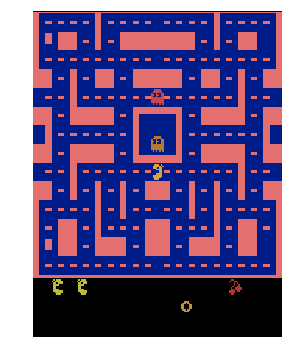

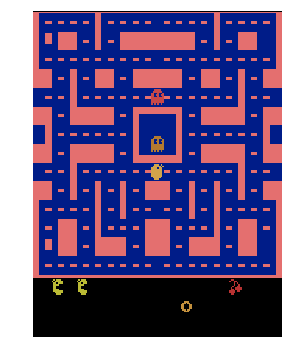

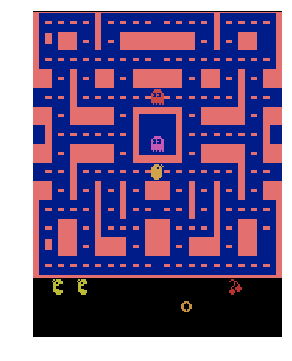

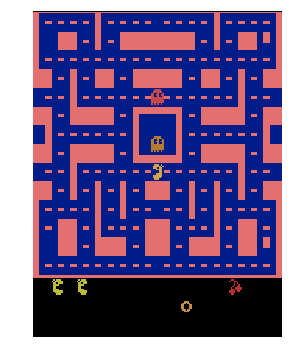

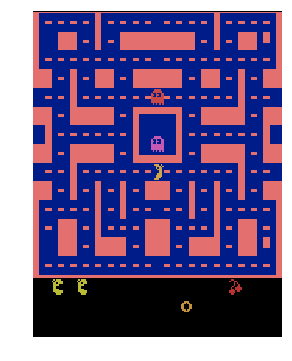

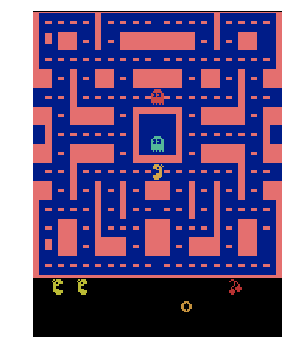

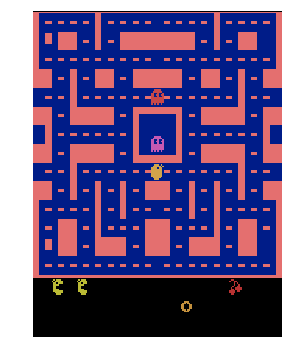

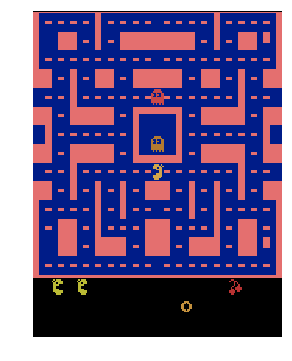

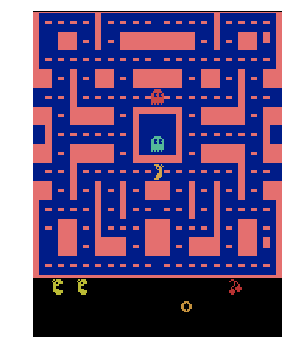

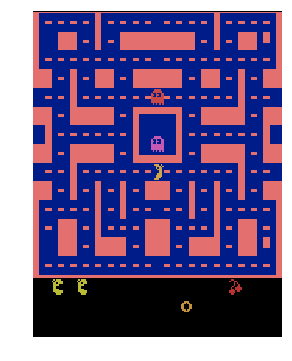

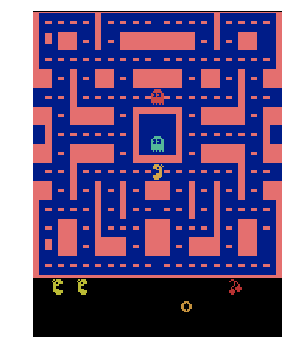

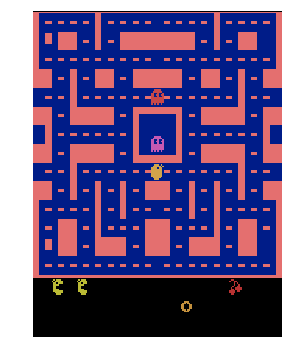

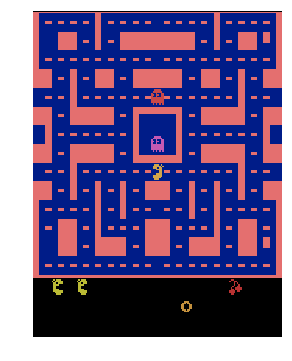

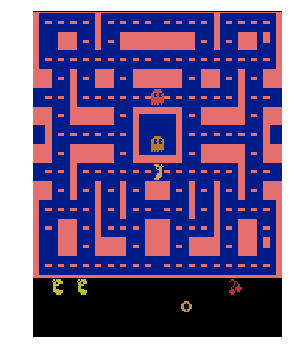

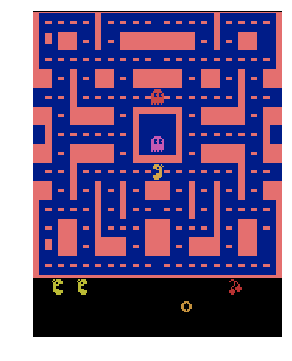

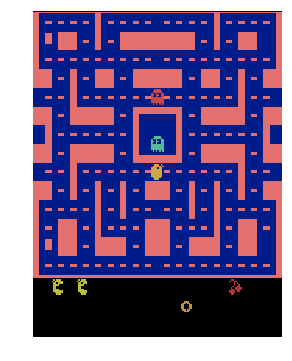

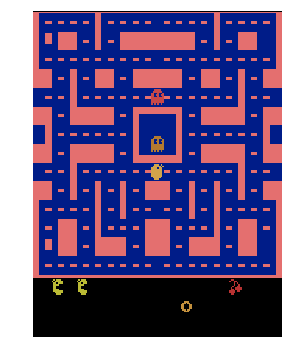

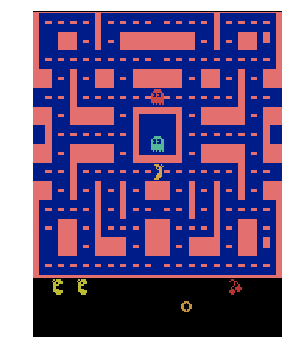

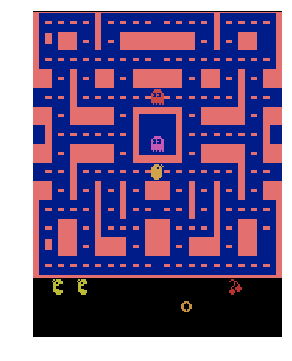

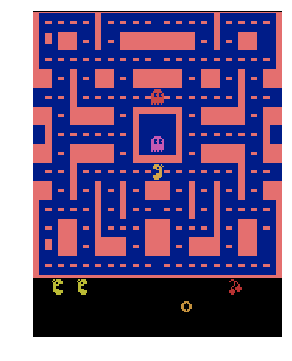

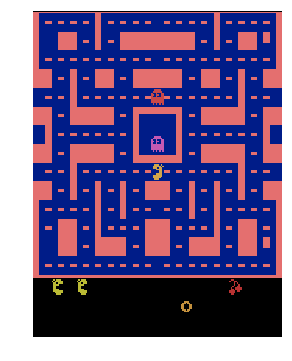

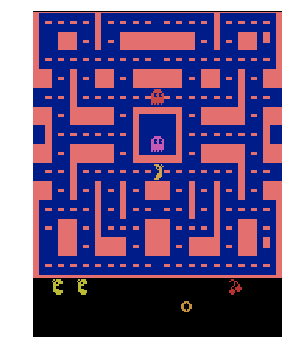

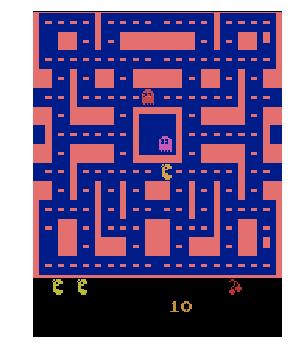

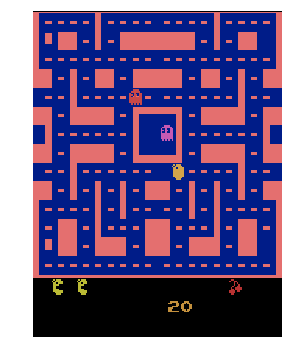

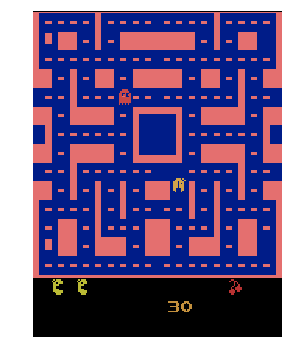

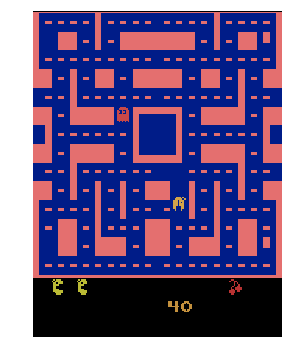

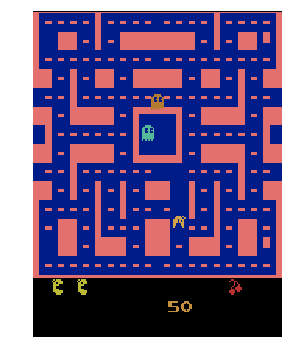

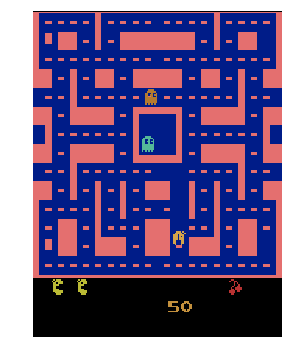

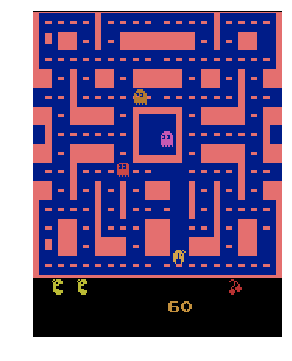

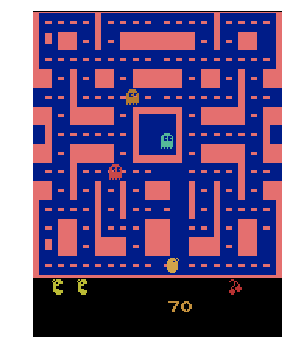

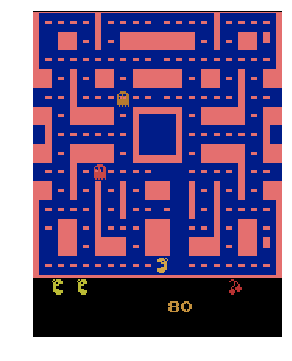

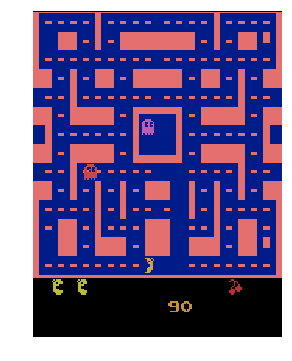

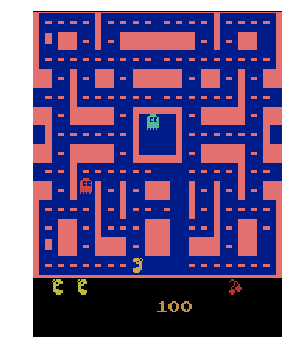

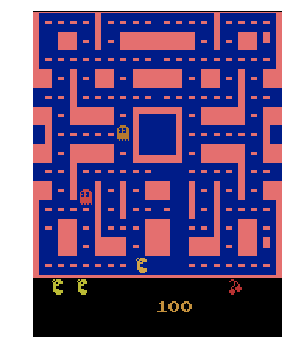

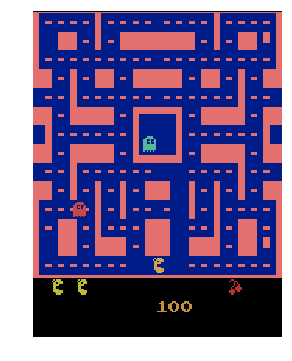

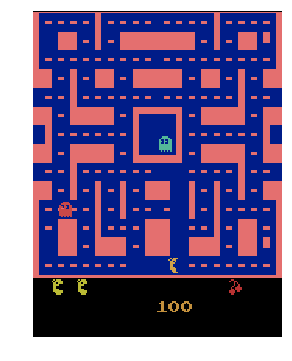

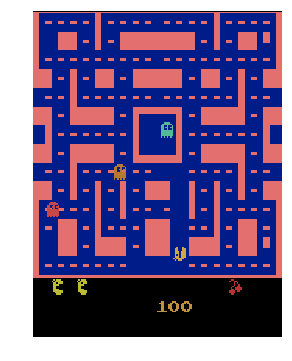

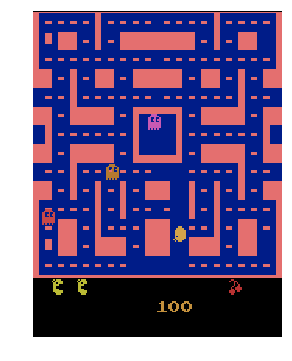

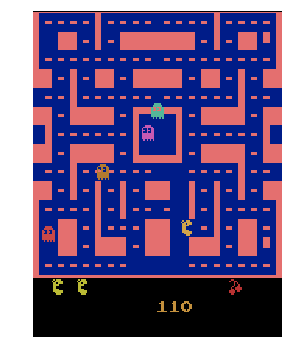

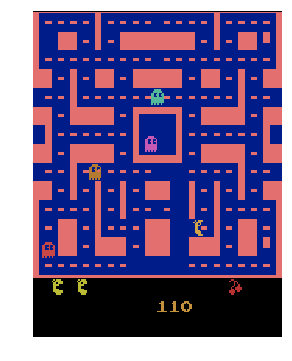

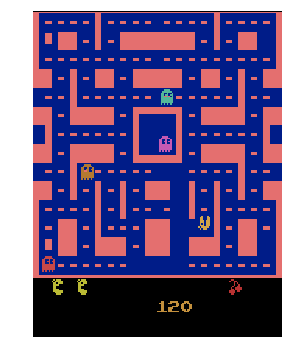

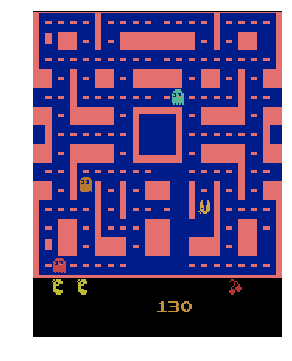

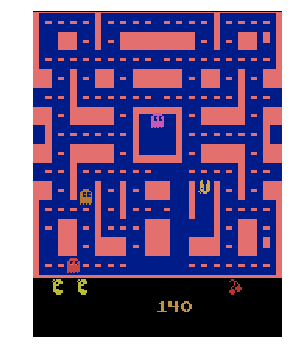

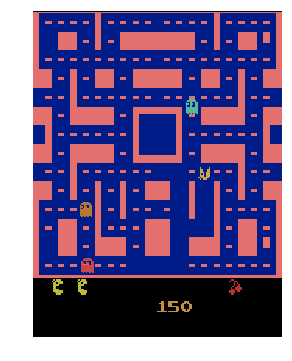

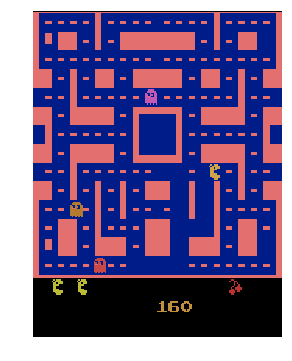

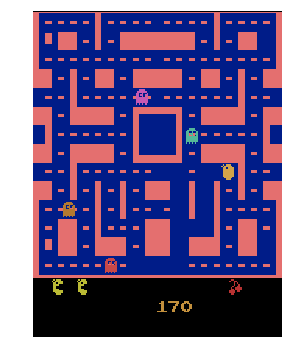

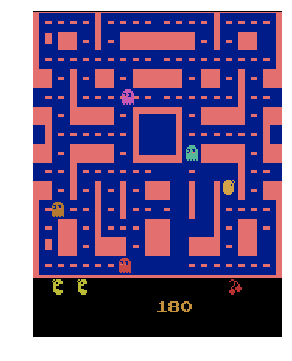

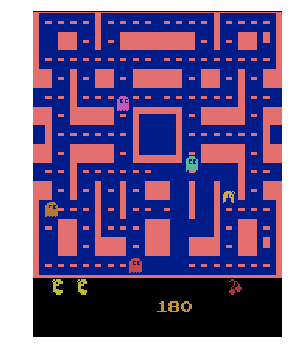

In [13]:

# plt.figure(figsize=(8, 6), dpi=80)

while(True):

    s = env.reset()
#     print(s.shape)
    s = np.array(s,dtype='float')
    s = preprocess(s, width, height)
    s = np.stack((s, s, s, s), axis=2)
    im = np.array(s, dtype = np.uint8)
    show_state(env)
#     plt.show()
    done = False

    while not done:
        action = RL.make_policy(s)

        n_s, reward, done, info =  skip_step(frame_repeat, env, env.step, action)
        show_state(env)
#         print(n_s.shape)
        im = np.array(n_s, dtype = np.uint8)
#         plt.cla()
        
        n_s = np.array(n_s,dtype='float')
        n_s = preprocess(n_s, width, height)
        n_s = np.append(s[:, :, 1:], np.expand_dims(n_s, 2), axis=2)
        
        

        s = n_s
